영문분석 + 워드클라우드
  - 형태소 분석, 품사태깅
  - 명사 단어추출 : Okt 품사 태깅 패키지로 명사 추출  from konlpy.tag import Okt
  - 단어 빈도 탐색
    - Counter()
  - 단어 빈도 히스토그램
    - font_manager.FontProperties()
    - matplotlib.pyplot

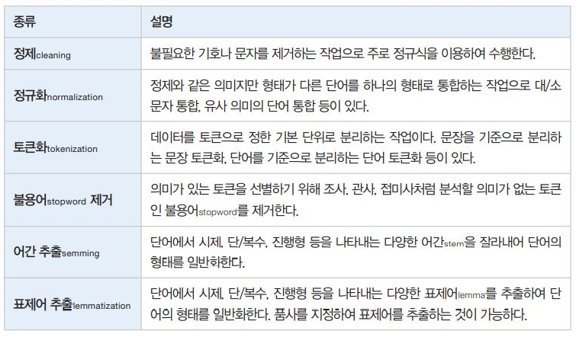

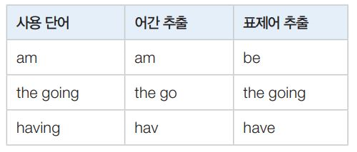

In [1]:
import pandas as pd
import glob
import re
from functools import reduce  #2차원 리스트의 차원을 줄여줄때 사용

In [3]:
from nltk.tokenize import word_tokenize  # 단어분리 토큰단위로
from nltk.corpus import stopwords # 불용어
from nltk.stem import WordNetLemmatizer # 표제어 추출
from collections import Counter # 단어의 개수
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS,WordCloud # 워드클라우드용 불용어모듈과 워드클라우드 모듈

In [5]:
all_files =  glob.glob('/content/data/*.xls')
all_files

['/content/data/myCabinetExcelData (1).xls',
 '/content/data/myCabinetExcelData (2).xls',
 '/content/data/myCabinetExcelData.xls']

In [7]:
all_files_data =  [pd.read_excel(filepath)   for filepath in all_files]

In [8]:
all_files_data_concat = pd.concat(all_files_data)
all_files_data_concat = all_files_data_concat.reset_index(drop=True)
all_files_data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  0 non-null      float64
 1   번호          300 non-null    int64  
 2   제목          300 non-null    object 
 3   저자          300 non-null    object 
 4   출판사         300 non-null    object 
 5   출판일         300 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.2+ KB


In [12]:
df = all_files_data_concat.dropna(axis=1).drop(columns=['번호'])
df

,제목,저자,출판사,출판일
0,A comparison on scalability for batch big data...,"García-Gil, Diego; Ramírez-Gallego, Sergio; Ga...",Springer Nature,2017
1,Strength in Numbers: Using Big Data to Simplif...,unknown,Mary Ann Leibert,2017
2,Call for Special Issue Papers: Big Scientific ...,"Anaraki, Farhad Pourkamali; Hariri-Ardebili, M...",Mary Ann Leibert,2021
3,Big Data for Social Good,unknown,Mary Ann Leibert,2015
4,Call for Papers: Special Issue on Computationa...,unknown,Mary Ann Leibert,2017
...,...,...,...,...
295,Call for Special Issue Papers: Soft Computing ...,"Chilamkurti, Naveen; Paul, Anand; Kumar, Akshi",Mary Ann Leibert,2020
296,Big Data Literature Search,unknown,Mary Ann Leibert,2014
297,Optimizing Sentinel-2 image selection in a Big...,"Kempeneers, P.; Soille, P.",John Wiley & Sons Ltd,2017
298,Atmospheric and ecosystem big data providing k...,"Kulmala, Markku; Lintunen, Anna; Ylivinkka, Il...",John Wiley & Sons Ltd,2021


In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
stw = set(stopwords.words("english"))  # 영어 불용어 추출
lemma = WordNetLemmatizer()

In [19]:
all_title = df['제목']

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
words = []
for title in all_title:
  # 1. 영문만 추출(그렇지 않으면 공백처리)
  EnWords = re.sub(r"[^a-zA-Z]+"," ",str(title))
  # print("영문만 추출",EnWords)
  # 2. 단어를 토큰화
  EnWordsToken = word_tokenize(EnWords.lower())
  # print("단어토큰화",EnWordsToken)
  # 3 불용어 제거
  EnWordsTokenStopLemma =  [ w for w in EnWordsToken if w not in stw ]
  # print("불용어 제거",EnWordsToken)
  words.append(EnWordsTokenStopLemma)

In [33]:
print(words)

[['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink'], ['strength', 'numbers', 'using', 'big', 'data', 'simplify', 'sentiment', 'classification'], ['call', 'special', 'issue', 'papers', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering'], ['big', 'data', 'social', 'good'], ['call', 'papers', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data'], ['efficient', 'ensemble', 'based', 'classification', 'framework', 'big', 'medical', 'data'], ['tv', 'audience', 'measurement', 'big', 'data'], ['using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project'], ['big', 'data', 'support', 'sustainable', 'development', 'goals', 'continued', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goals', 'cbas'], ['big', 'data', 'big', 'deal'], ['artificial', 'bee', 'colony', 'reinforced', 'extended', 'kalman', '

In [36]:
words2 = list(reduce(lambda x,y : x+y, words))
print(words2)

['comparison', 'scalability', 'batch', 'big', 'data', 'processing', 'apache', 'spark', 'apache', 'flink', 'strength', 'numbers', 'using', 'big', 'data', 'simplify', 'sentiment', 'classification', 'call', 'special', 'issue', 'papers', 'big', 'scientific', 'data', 'machine', 'learning', 'science', 'engineering', 'big', 'data', 'social', 'good', 'call', 'papers', 'special', 'issue', 'computational', 'propaganda', 'political', 'big', 'data', 'efficient', 'ensemble', 'based', 'classification', 'framework', 'big', 'medical', 'data', 'tv', 'audience', 'measurement', 'big', 'data', 'using', 'big', 'data', 'understand', 'human', 'condition', 'kavli', 'human', 'project', 'big', 'data', 'support', 'sustainable', 'development', 'goals', 'continued', 'celebration', 'establishment', 'international', 'research', 'center', 'big', 'data', 'sustainable', 'development', 'goals', 'cbas', 'big', 'data', 'big', 'deal', 'artificial', 'bee', 'colony', 'reinforced', 'extended', 'kalman', 'filter', 'localizatio

In [43]:
# 단어빈도수 구하기
dict(pd.DataFrame(words2)[0].value_counts()[:50])

{'data': 347,
 'big': 312,
 'analytics': 59,
 'issue': 33,
 'special': 33,
 'call': 31,
 'papers': 31,
 'based': 30,
 'analysis': 24,
 'earth': 23,
 'learning': 20,
 'using': 18,
 'processing': 13,
 'development': 13,
 'computing': 13,
 'framework': 13,
 'driven': 13,
 'approach': 13,
 'new': 12,
 'model': 12,
 'management': 12,
 'system': 12,
 'science': 11,
 'models': 11,
 'systems': 10,
 'editorial': 10,
 'review': 10,
 'mining': 10,
 'guest': 10,
 'machine': 10,
 'distributed': 10,
 'internet': 9,
 'deep': 9,
 'cloud': 9,
 'perspective': 9,
 'things': 9,
 'goals': 9,
 'algorithms': 9,
 'sustainable': 9,
 'survey': 8,
 'health': 8,
 'support': 8,
 'applications': 8,
 'classification': 8,
 'scientific': 8,
 'engineering': 8,
 'business': 7,
 'digital': 7,
 'challenges': 7,
 'scalable': 7}

In [45]:
count = Counter(words2)
word_count =  dict(count.most_common(50))
word_count

{'data': 347,
 'big': 312,
 'analytics': 59,
 'special': 33,
 'issue': 33,
 'call': 31,
 'papers': 31,
 'based': 30,
 'analysis': 24,
 'earth': 23,
 'learning': 20,
 'using': 18,
 'processing': 13,
 'framework': 13,
 'development': 13,
 'computing': 13,
 'approach': 13,
 'driven': 13,
 'management': 12,
 'model': 12,
 'system': 12,
 'new': 12,
 'science': 11,
 'models': 11,
 'machine': 10,
 'systems': 10,
 'review': 10,
 'guest': 10,
 'editorial': 10,
 'distributed': 10,
 'mining': 10,
 'sustainable': 9,
 'goals': 9,
 'internet': 9,
 'things': 9,
 'cloud': 9,
 'deep': 9,
 'perspective': 9,
 'algorithms': 9,
 'classification': 8,
 'scientific': 8,
 'engineering': 8,
 'support': 8,
 'applications': 8,
 'health': 8,
 'survey': 8,
 'business': 7,
 'challenges': 7,
 'smart': 7,
 'scalable': 7}

In [ ]:
import seaborn as sns
df2 = pd.DataFrame(words2)
df2.columns = ['title']
sns.countplot(data=df2,x='title')
plt.xticks(rotation=45)
plt.show()

In [58]:
word_count.pop('data'),word_count.pop('big')

(347, 312)

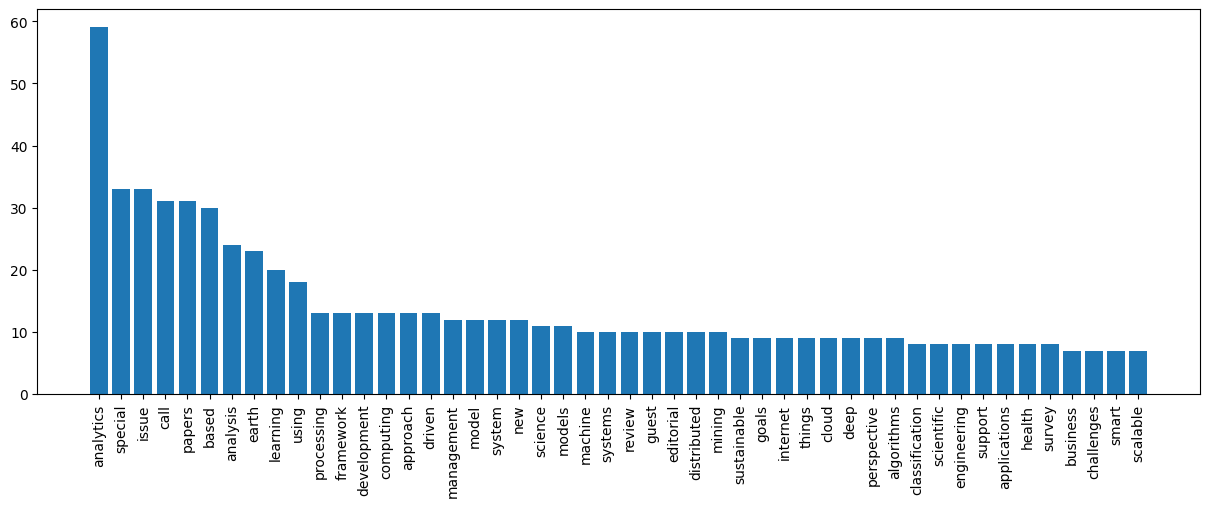

In [59]:
plt.figure(figsize=(15,5))
plt.bar(x=word_count.keys(), height=word_count.values())
plt.xticks(rotation=90)
plt.show()

워드클라우드

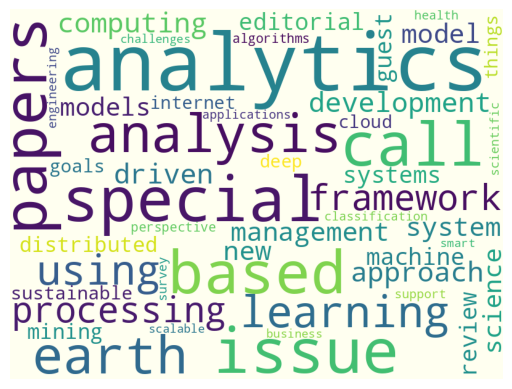

In [64]:
stw = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stw, width=800,height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [65]:
cloud.to_file('myWordCloud.jpg')